<h2>Finding tops and bottoms</h2>

In [12]:
import pandas as pd
import numpy as np
from sup_res_id import rw_extremes, get_extremes


df = pd.read_csv("./Data/History/XAUUSD_M5_2023.csv")
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) +' ' + df['Timestamp'], format='%Y%m%d %H:%M:%S')

# Drop the original Date and Timestamp columns and changing the order the columns
df = df.drop(columns=['Date'])
df.rename(columns={'Timestamp': 'Time'}, inplace=True)
df.columns = df.columns.str.lower()



# pivot found with rolling window   
rw_tops, rw_bottoms = rw_extremes(df['close'], 10)
print(f'{len(rw_tops)+ len(rw_bottoms)} tops and bottoms were found with rolling window method')

#pivot found with directional change method
dc_pivot = get_extremes(df, 0.003)
dc_pivot.head(10)
print(f'{len(dc_pivot)} tops and bottoms were found with directional change method')

1532 tops and bottoms were found with rolling window method
1080 tops and bottoms were found with directional change method


100%|██████████| 46/46 [00:57<00:00,  1.24s/it]


<BarContainer object of 46 artists>

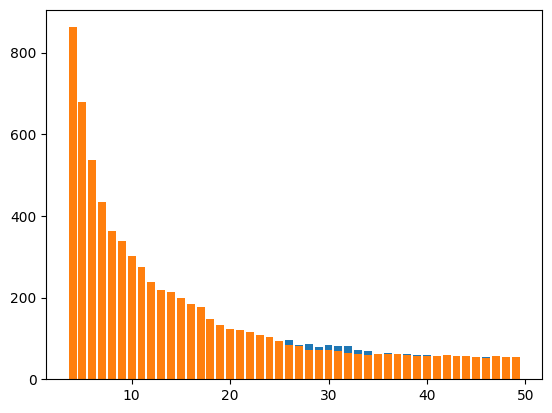

In [13]:
from flags_pennants import find_flags_pennants_trendline, find_flags_pennants_pips, FlagPattern
import matplotlib.pyplot as plt
from tqdm import tqdm

analisis_size = 50
nb_patterns_pips = np.zeros(analisis_size - 4)
nb_patterns_trendline = np.zeros(analisis_size - 4)

for i in tqdm(range(4,analisis_size)):
    pips_bull_flags, pips_bear_flags, pips_bull_pennants, pips_bear_pennants = find_flags_pennants_pips(np.array(df['close']), i)
    trendline_bull_flags, trendline_bear_flags, trendline_bull_pennants, trendline_bear_pennants = find_flags_pennants_trendline(np.array(df['close']), i)
    nb_patterns_trendline[i - 4] = len(trendline_bull_flags) + len(trendline_bear_flags) + len(trendline_bull_pennants) + len(trendline_bear_pennants)
    nb_patterns_pips[i - 4] = len(pips_bull_flags) + len(pips_bear_flags) + len(pips_bull_pennants) + len(pips_bear_pennants)

plt.bar(np.arange(4, analisis_size, 1), nb_patterns_pips)
plt.bar(np.arange(4, analisis_size, 1), nb_patterns_trendline)



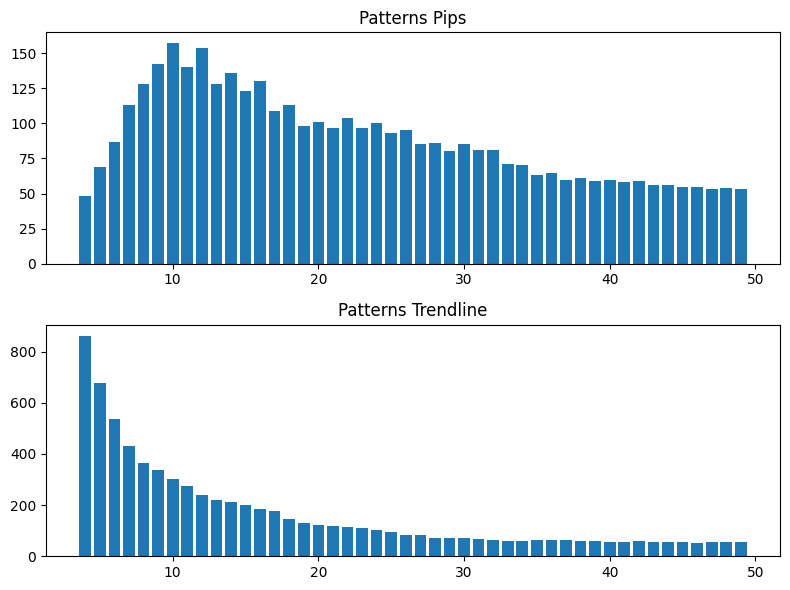

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
# First subplot
ax1.bar(np.arange(4, analisis_size, 1), nb_patterns_pips)
ax1.set_title('Patterns Pips')

# Second subplot
ax2.bar(np.arange(4, analisis_size, 1), nb_patterns_trendline)
ax2.set_title('Patterns Trendline')

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
pips_bull_flags, pips_bear_flags, pips_bull_pennants, pips_bear_pennants = find_flags_pennants_pips(np.array(df['close']), i)
trendline_bull_flags, trendline_bear_flags, trendline_bull_pennants, trendline_bear_pennants = find_flags_pennants_trendline(np.array(df['close']), i)

